In [1]:
#import the libraries
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#read loan csv into dataframe
df = pd.read_csv("loan.csv",low_memory=False)

In [3]:
#check for size and do initial columns lookup
df.shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Clearing columns with missing values in all rows

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#drop all column with all values are NaN
df = df.dropna(axis=1,how="all")

In [7]:
df.shape

(39717, 57)

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
#columns with only 0 values don't serve any purpose hence getting rid of them
df = df.loc[:, (df != 0).any(axis=0)]


In [10]:
df.shape

(39717, 55)

In [11]:
#tried to remove columns with float values is similar way but it didn't work
df.loc[:, (df != 0.0).any(axis=0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,Apr-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,Jan-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN


In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0


In [13]:
# Hence, fill up NaN values with 0 to columns that are not needed to make it easy to drop them

df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

In [14]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [15]:
df['tax_liens'] = df['tax_liens'].fillna(0)

In [16]:
df = df.loc[:, (df != 0.0).any(axis=0)]


In [17]:
df.shape

(39717, 52)

## Removing columns that do not contribute to analysis

**List of columns that we rounded up in initial review**
- url -> has same url with loan id
- pymnt_plan -> all values are n
- desc - not helpful for analysis
- initial_list_status - > all values are f
- application_type -> all values are INDIVIDUAL
- policy_code -> all value are 1

In [18]:
df = df.drop(['url','pymnt_plan','desc','initial_list_status','application_type','policy_code'],axis=1)

In [19]:
df.shape

(39717, 46)

In [20]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [21]:
df['id'].nunique() == len(df['id'])

True

In [22]:
df['member_id'].nunique() == len(df['member_id'])

True

In [23]:
df = df.drop(['id'],axis=1)

In [24]:
df.shape

(39717, 45)

In [25]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Checking if any of the rows have shifted values

In [26]:
df.dtypes

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [27]:
df.pub_rec_bankruptcies

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

### Comparing Loan amount and Funded amount

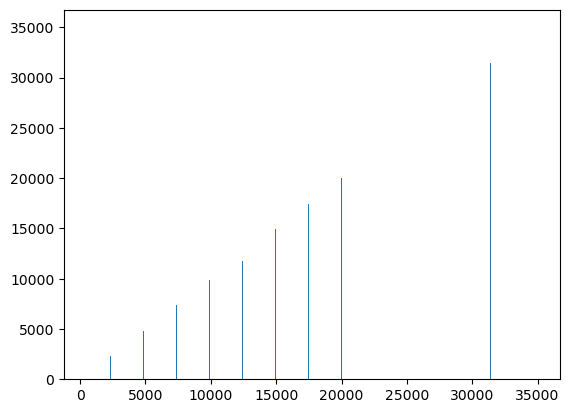

In [28]:
plt.bar(df.loan_amnt,df.funded_amnt_inv)
plt.show()

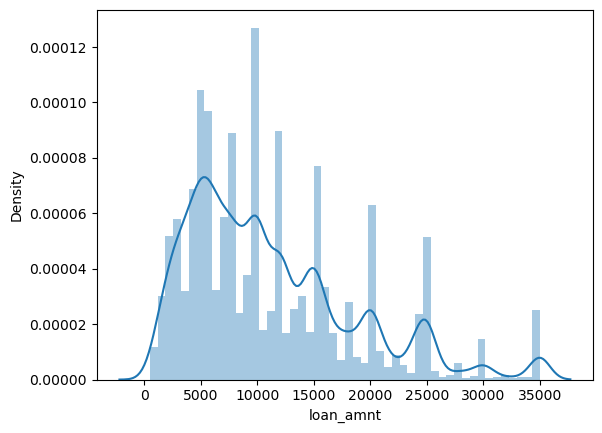

In [29]:
sns.distplot(df.loan_amnt)
plt.show()

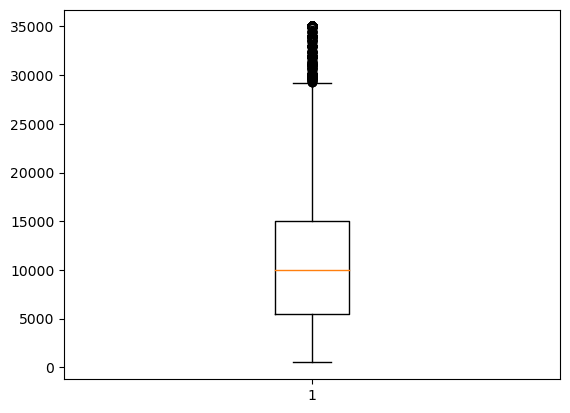

In [30]:
plt.boxplot(df.loan_amnt)
plt.show()

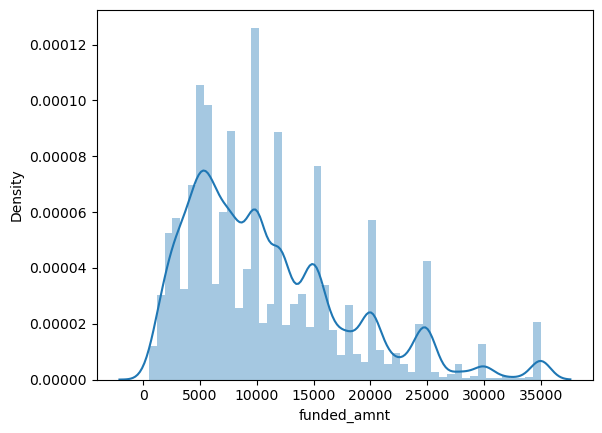

In [31]:
sns.distplot(df.funded_amnt)
plt.show()

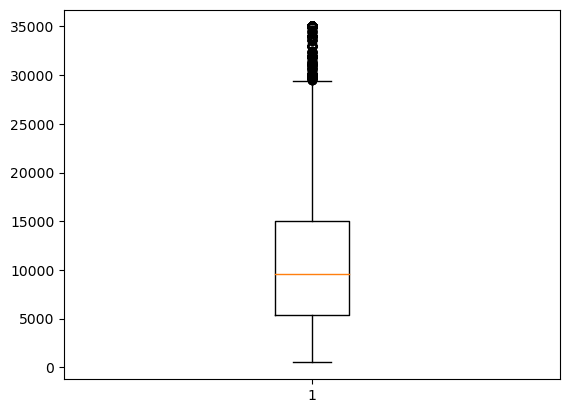

In [32]:
plt.boxplot(df.funded_amnt)
plt.show()

Text(0.5, 1.0, 'Funded Amount')

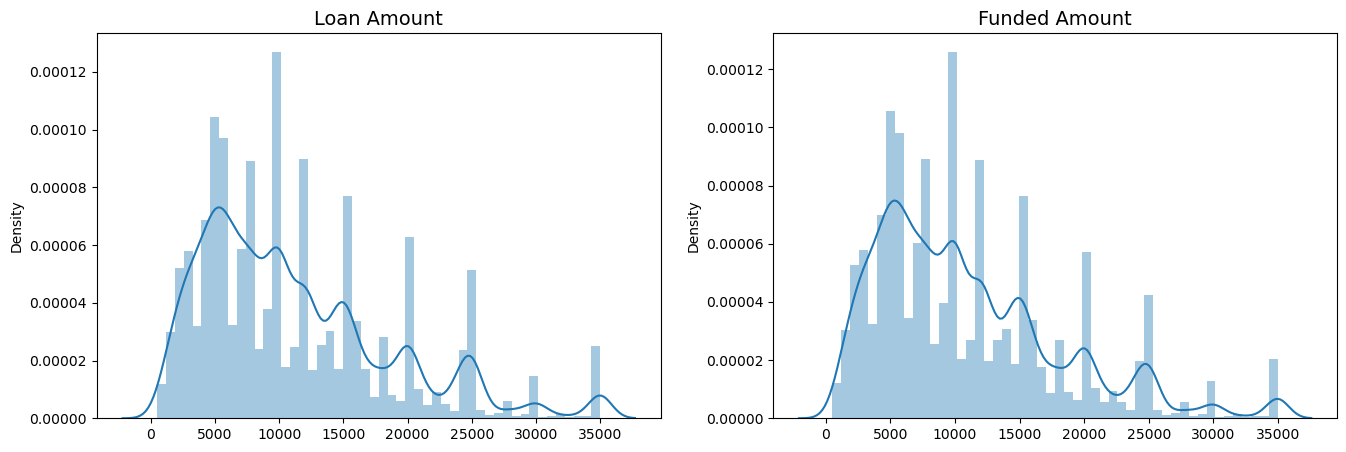

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.distplot(df["loan_amnt"].values , ax = ax[0])
ax[0].set_title("Loan Amount", fontsize=14)
sns.distplot(df["funded_amnt"].values, ax=ax[1])
ax[1].set_title("Funded Amount", fontsize=14)

### Loan status and Loan amount

In [34]:
#removed rows with loan status as Current
df= df[df.loan_status != "Current"]


In [35]:
df.shape

(38577, 45)

In [36]:
loan_status = df["loan_status"].values
loan_amount = df["loan_amnt"].values


Text(0.5, 1.0, 'Loan Status')

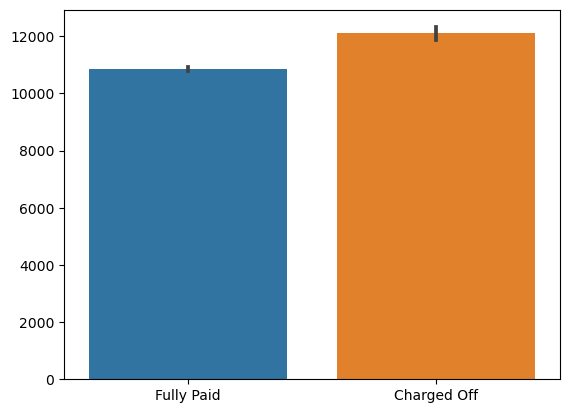

In [37]:
sns.barplot(x=loan_status,y=loan_amount)
ax[0].set_title("Loan Status", fontsize=14)

There is a high likelyhood that if the loan amount is high the probability of defaulting is high

In [38]:
# distribution of term , removing months string from the column
df.term = df.term.str.rstrip(" months")

In [39]:
df.term = df.term.astype("int32")

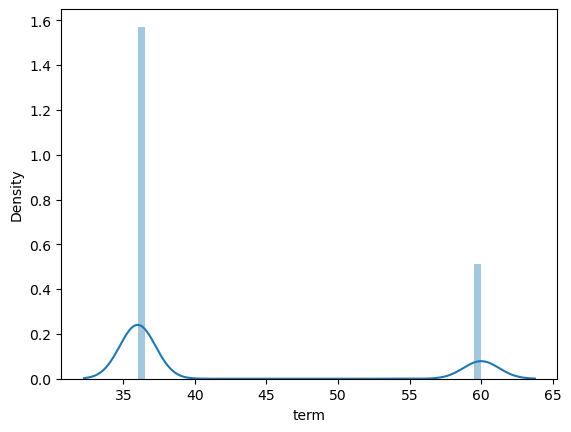

In [40]:
sns.distplot(df.term)
plt.show()

Text(0.5, 1.0, 'Loan Status')

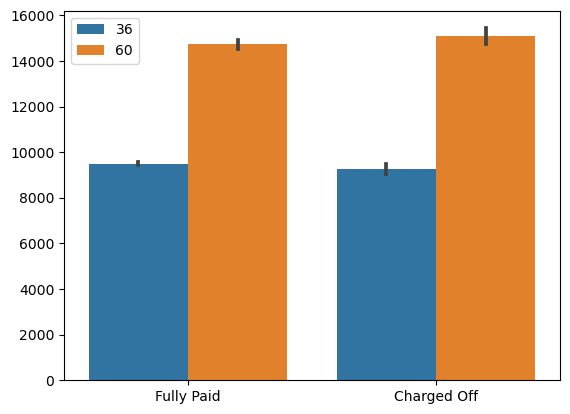

In [41]:
loan_status = df["loan_status"].values
funded_amount = df["funded_amnt"].values

term = df["term"].values
grade = df["grade"].values

sns.barplot(x=loan_status,y=funded_amount,hue=term)
ax[0].set_title("Loan Status", fontsize=14)

In [42]:
#interest rate against loan amount
df.int_rate = df.int_rate.str.rstrip("%")

In [43]:
df.int_rate = df.int_rate.astype("float64")

In [44]:
df.int_rate.dtype

dtype('float64')

Text(0.5, 1.0, 'Loan Status')

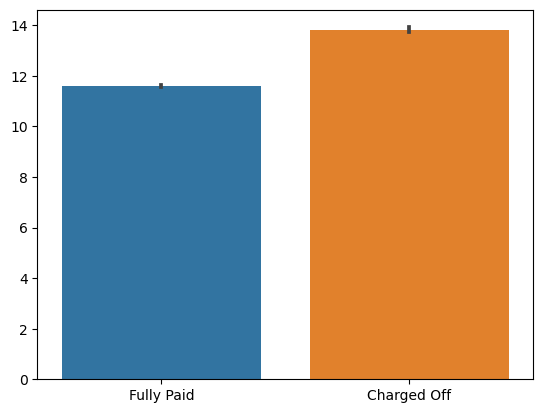

In [45]:
interest_rate = df["int_rate"].values

sns.barplot(x=loan_status,y=interest_rate)
ax[0].set_title("Loan Status", fontsize=14)

In [46]:
#Higher interest rate loans seem to have higher defaulters

Text(0.5, 1.0, 'verification  Status')

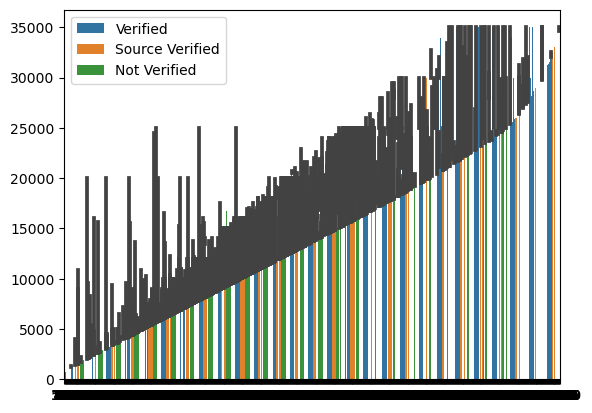

In [47]:
#verification status Loan status
verification_status = df.verification_status.values

sns.barplot(x=funded_amount,y=loan_amount,hue=verification_status)
ax[0].set_title("verification  Status", fontsize=14)

In [48]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [49]:
#Charged off => probability of default

# Removed  Current
loan_status1 = df.loan_status.value_counts()[:-1]

In [50]:
loan_status1

Fully Paid    32950
Name: loan_status, dtype: int64

In [51]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [52]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145224193')

In [53]:
df.issue_d.head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [54]:
df['date'] = pd.to_datetime(df.issue_d, format="%b-%y")

In [55]:
df['date']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: date, Length: 38577, dtype: datetime64[ns]

In [56]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [57]:
df["year"] 

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 38577, dtype: int64

In [58]:
year_values = df["year"].value_counts().values

In [59]:
year_index =  df["year"].value_counts().index

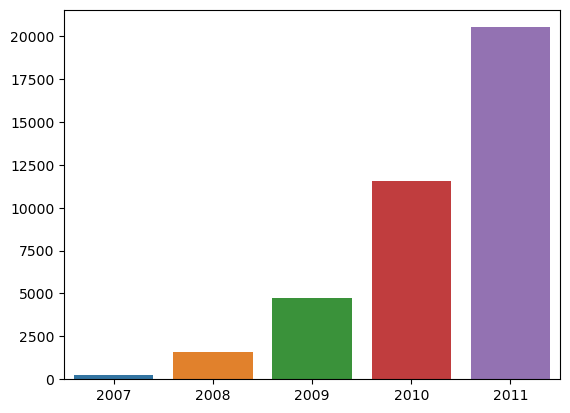

In [60]:
sns.barplot(x= year_index, y=year_values)
plt.show()

In [61]:
#loan amount v/s year of issue

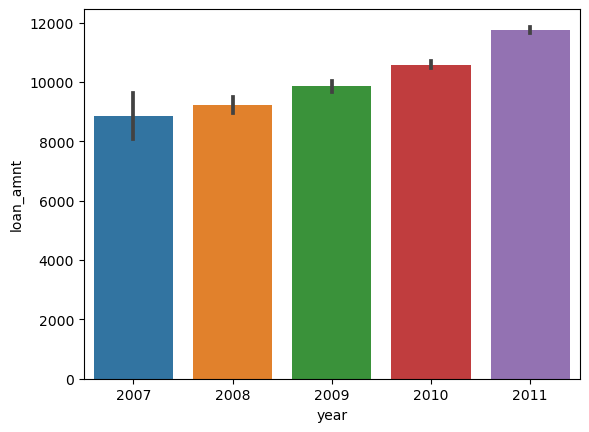

In [62]:
sns.barplot(y=df.loan_amnt,x= df["year"])
plt.show()

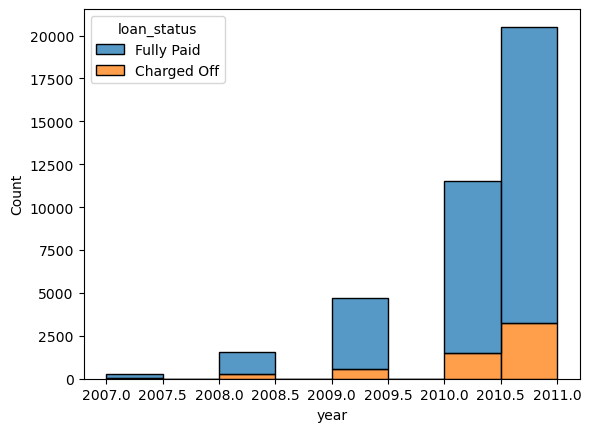

In [63]:
sns.histplot(binwidth=0.5, x=df['year'], hue=df['loan_status'], data=df, stat="count", multiple="stack")
plt.show()

In [64]:
#remove Source from verification column

df['verification_status_new'] = df['verification_status'].str.lstrip("Source ")


<Axes: xlabel='loan_status', ylabel='Count'>

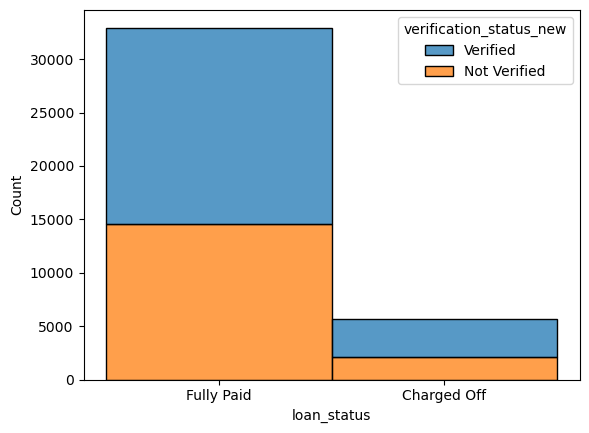

In [65]:
sns.histplot(binwidth=0.5, x=df['loan_status'], hue=df['verification_status_new'], data=df, stat="count", multiple="stack")


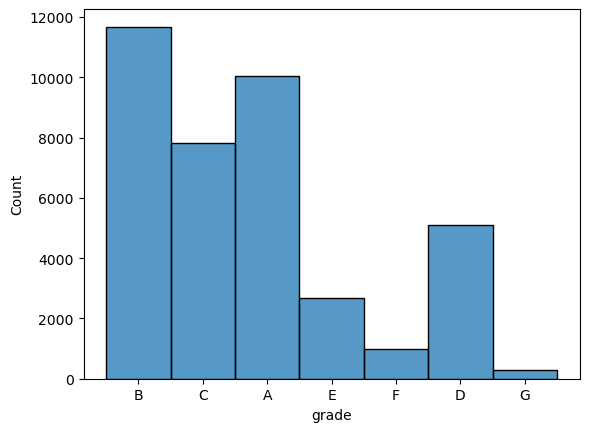

In [66]:
sns.histplot(df.grade)
plt.show()

In [67]:
df[df['grade'] == 'D']['loan_status'].value_counts()

Fully Paid     3967
Charged Off    1118
Name: loan_status, dtype: int64

In [68]:
df[df['grade'] == 'G']['loan_status'].value_counts()

Fully Paid     198
Charged Off    101
Name: loan_status, dtype: int64

In [69]:
df[df['grade'] == 'B']['loan_status'].value_counts()


Fully Paid     10250
Charged Off     1425
Name: loan_status, dtype: int64

In [70]:
df[df['grade'] == 'C']['loan_status'].value_counts()

Fully Paid     6487
Charged Off    1347
Name: loan_status, dtype: int64

In [71]:
df[df['grade'] == 'A']['loan_status'].value_counts()

Fully Paid     9443
Charged Off     602
Name: loan_status, dtype: int64

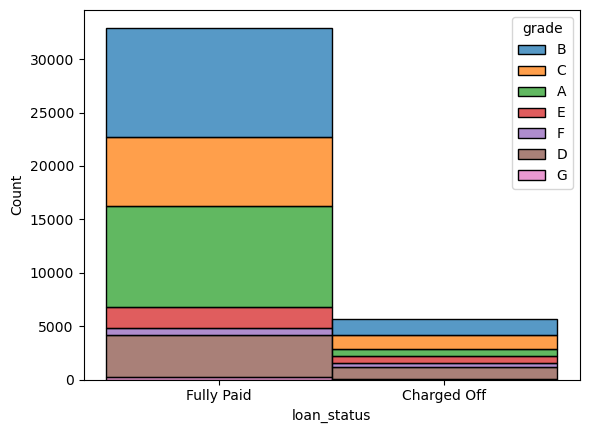

In [72]:
sns.histplot(binwidth=0.5, x=df['loan_status'], hue=df['grade'], data=df, stat="count", multiple="stack")
plt.show()

In [73]:
# Loans with grade B,C,D have high probability of defaulters

<Axes: xlabel='loan_status', ylabel='Count'>

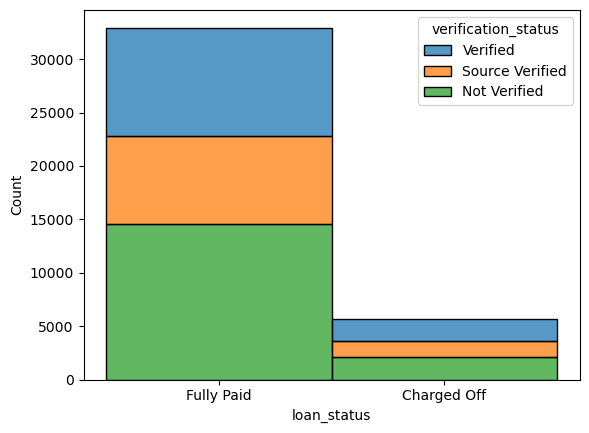

In [74]:
sns.histplot(binwidth=0.5, x=df.loan_status, hue=df.verification_status, data=df, stat="count", multiple="stack")


In [75]:
# There seems to be no differnce wrt verification status

In [76]:
# emp_length vc loan status
df['emp_length'] = df['emp_length'].str.replace('<','').str.replace('+','').str.replace(' years','').str.replace(' year','')

df['emp_length']


## check count of Nan

nan_count = df['emp_length'].isna().sum()

print(nan_count)



1033


In [77]:
emp_comparision = df.dropna(subset=['emp_length'])

emp_comparision.shape


(37544, 48)

In [78]:
emp_comparision['emp_length'] = emp_comparision['emp_length'].astype(int)


emp_comparision['emp_length'].dtype

dtype('int32')

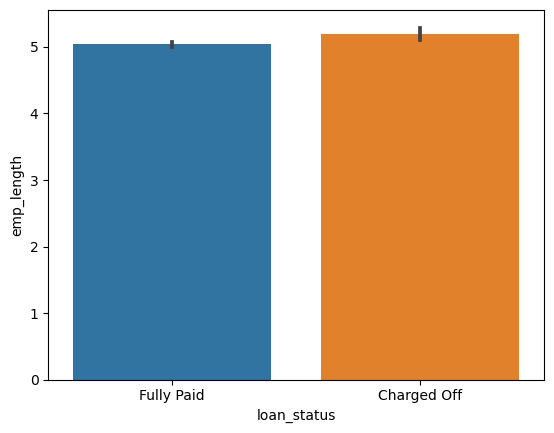

In [79]:
sns.barplot(x=emp_comparision.loan_status,y= emp_comparision["emp_length"])
plt.show()

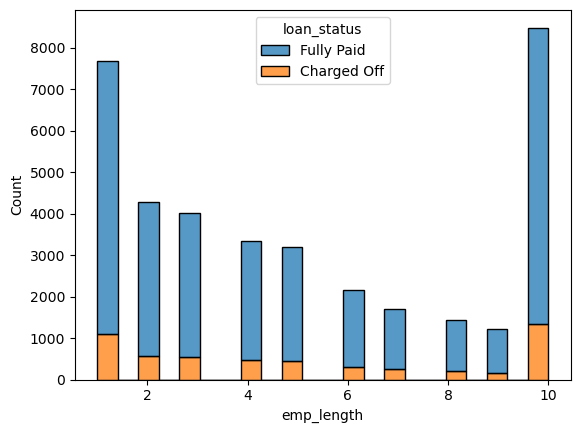

In [80]:
sns.histplot(x= emp_comparision.emp_length,  hue=emp_comparision.loan_status, data=emp_comparision, stat="count", multiple="stack")
plt.show()

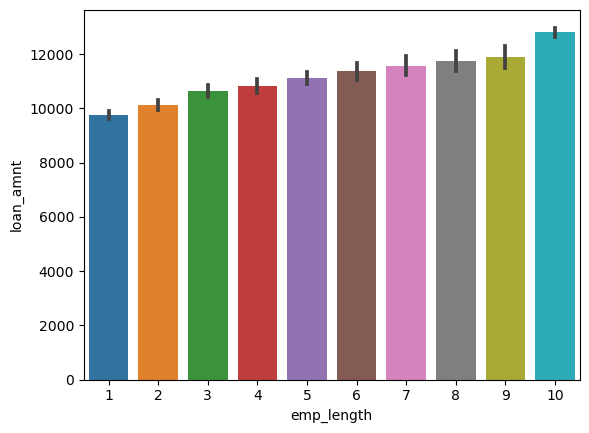

In [81]:
sns.barplot(x=emp_comparision.emp_length, y=emp_comparision.loan_amnt )
plt.show()

Its found that people with heigher experience tend have higher loan amount and there is a higher probability of them paying back

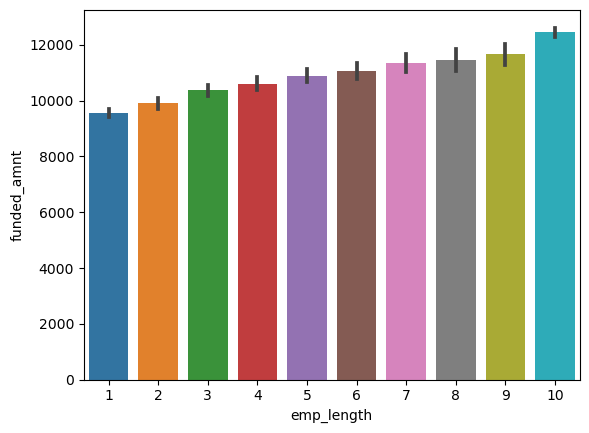

In [82]:
sns.barplot(x=emp_comparision.emp_length, y=emp_comparision.funded_amnt )
plt.show()

<Axes: xlabel='loan_status', ylabel='Count'>

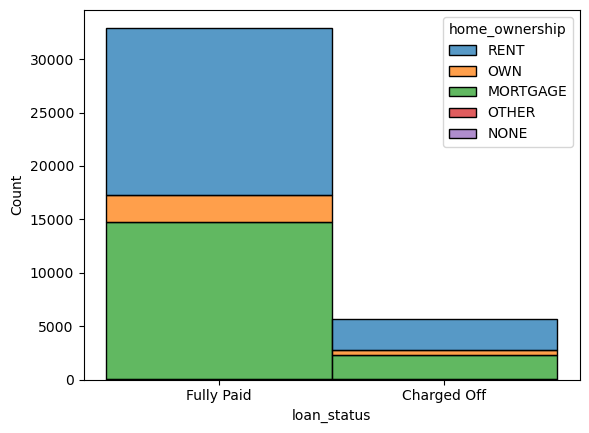

In [83]:
#checking home_ownership with respect to loan status

sns.histplot(binwidth=0.5, x=df.loan_status, hue=df.home_ownership, data=df, stat="count", multiple="stack")


In [84]:
#people who are renting or paying mortgage are having higher percentage of defaulting when compoared to those who own a home


In [85]:
na_count = df['annual_inc'].isna().sum()
print(na_count)


0


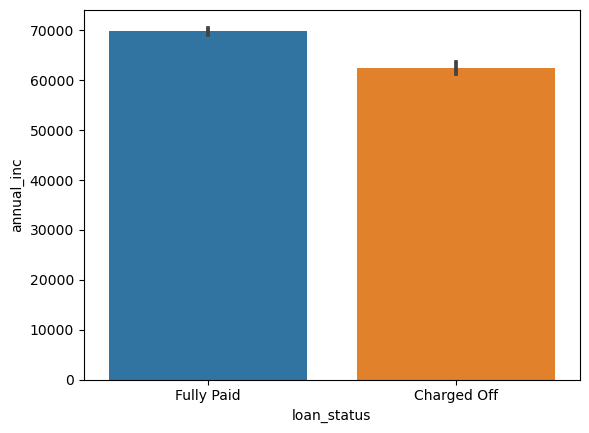

In [86]:
sns.barplot(y=df.annual_inc, x=df.loan_status )
plt.show()

In [87]:
#loan purpose with respect to loan status
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

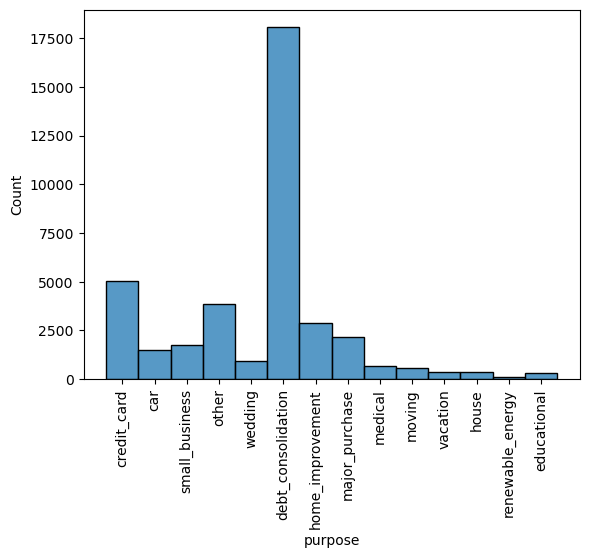

In [88]:
sns.histplot(df.purpose)
plt.xticks(rotation=90)
plt.show()

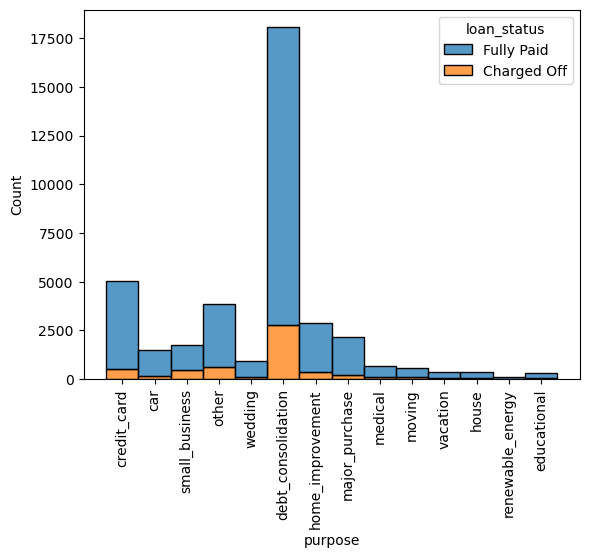

In [89]:
sns.histplot(hue=df.loan_status, x=df.purpose ,data=df, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='purpose'>

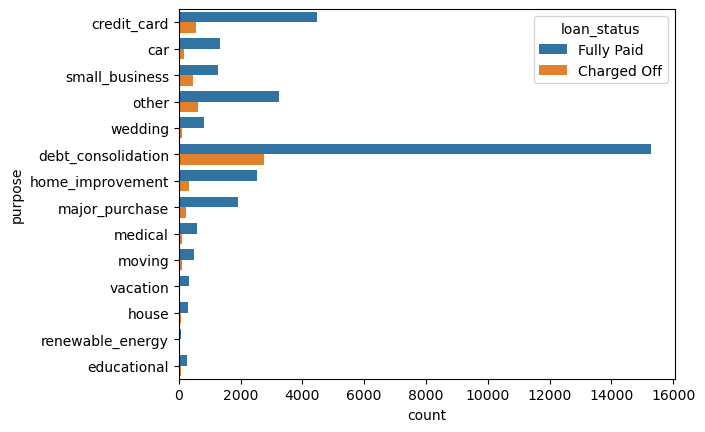

In [90]:
sns.countplot(data=df, y=df.purpose, hue=df.loan_status)

In [91]:
df['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

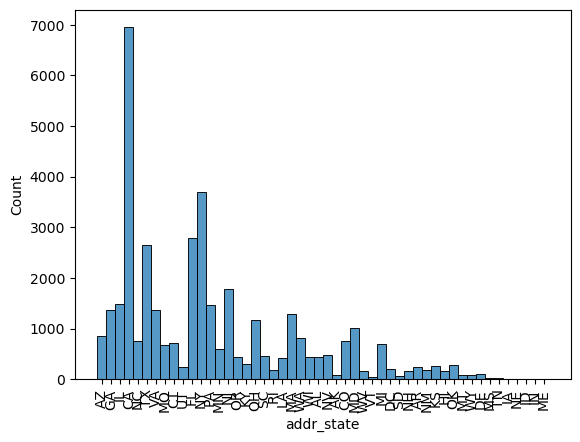

In [92]:
sns.histplot(df.addr_state)
plt.xticks(rotation=90)
plt.show()

<Axes: >

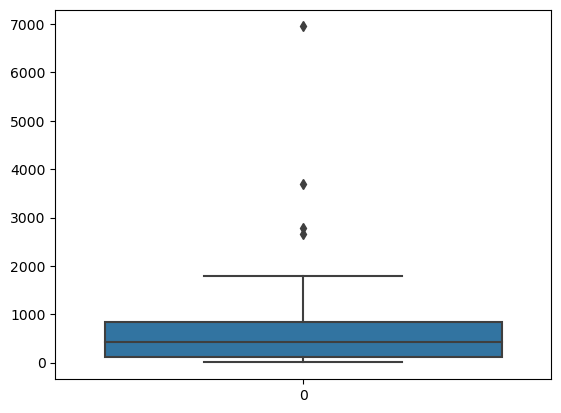

In [93]:
sns.boxplot(df["addr_state"].value_counts())

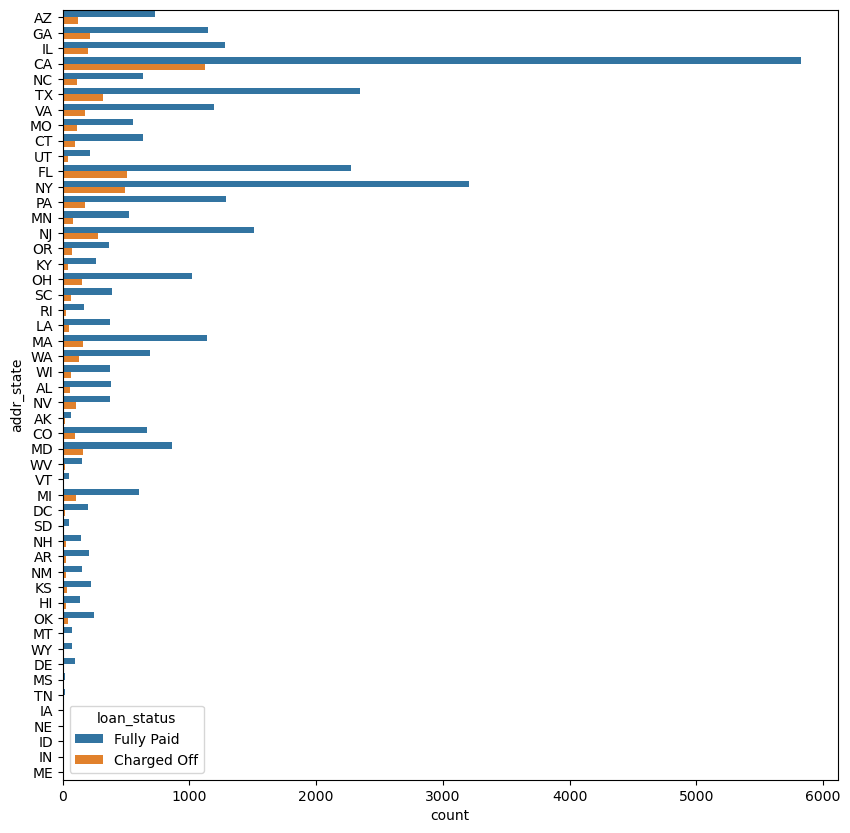

In [94]:
plt.figure(figsize=(10, 10)) 
sns.countplot(data=df, y=df.addr_state, hue=df.loan_status)
plt.show()

Your debt-to-income ratio (DTI) is all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

In [95]:
#dti column check

df['dti'].isna().sum()

0

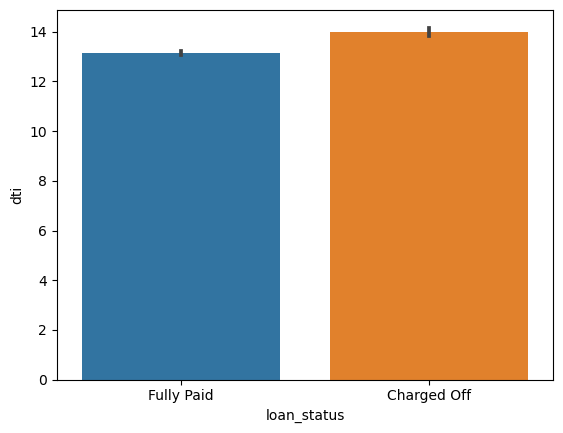

In [96]:
#no Na values in this column hence can be used to compare with loan status.
sns.barplot(y=df.dti, x=df.loan_status )
plt.show()


In [97]:
# loan amt vs dti with hue as loan status -> TODO
# try doing with other columns as well to compare
# do derived analysis with month
# compare averages

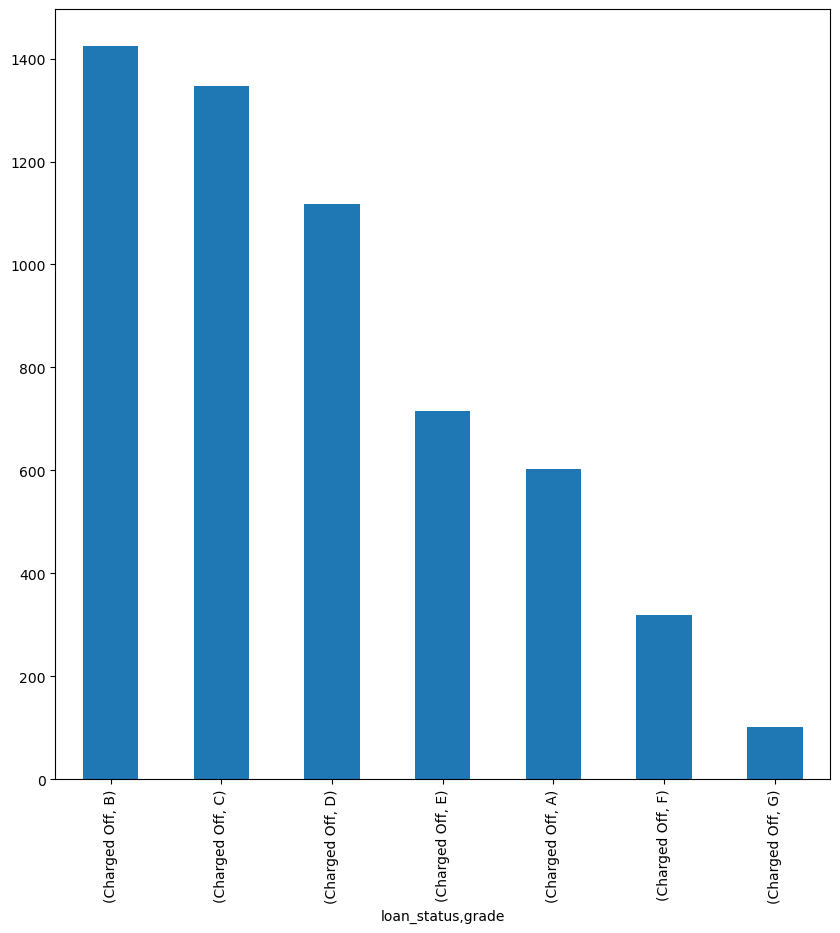

In [109]:
plt.figure(figsize=(10, 10)) 
charged_off_only = df[df['loan_status']=='Charged Off'];
grouped_data = charged_off_only.groupby('loan_status')['grade'].value_counts();
grouped_data.plot(kind='bar', stacked=True)
plt.show()

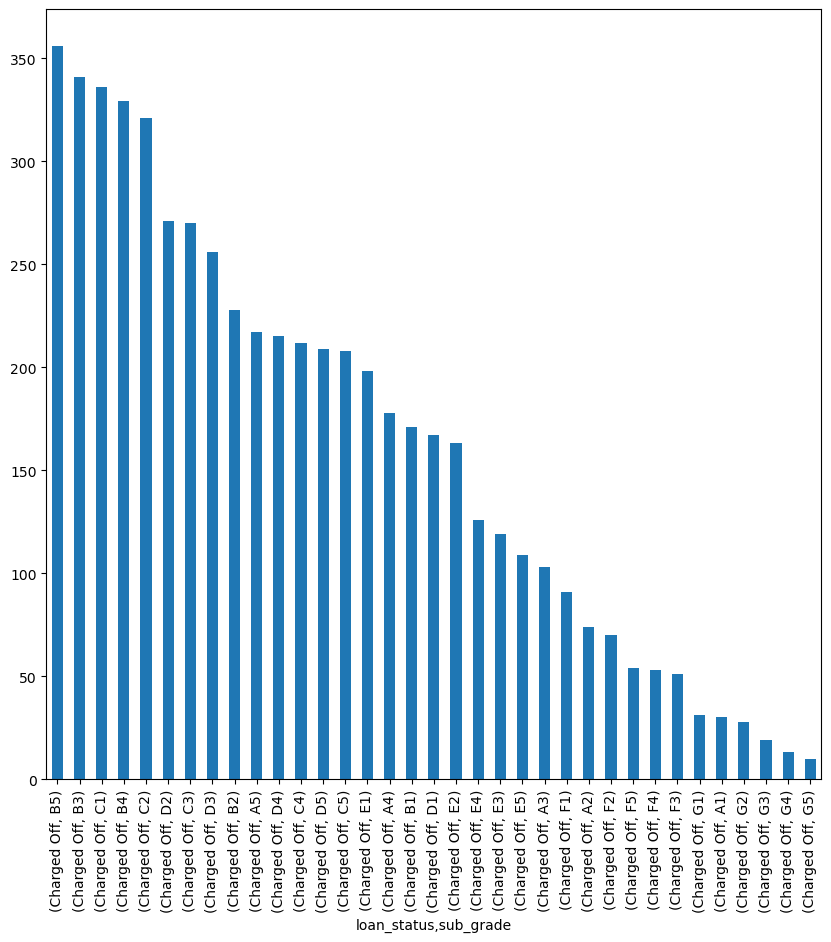

In [108]:
plt.figure(figsize=(10, 10)) 
charged_off_only = df[df['loan_status']=='Charged Off'];
grouped_data = charged_off_only.groupby('loan_status')['sub_grade'].value_counts();
grouped_data.plot(kind='bar', stacked=True)
plt.show()

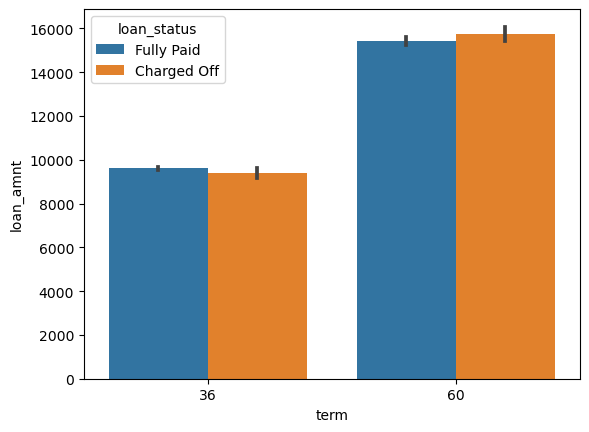

In [112]:
# loan amt . income vs dti with hue as loan status -> TODO
## loan amt . home ownership vs dti with hue as loan status -> TODO
sns.barplot(x=df.term, y=df.loan_amnt, hue=df.loan_status)
plt.show()

when loan amount is higher along with the term being 60 months, there is a higher probability of defaulting

## Home ovenership with Loan status

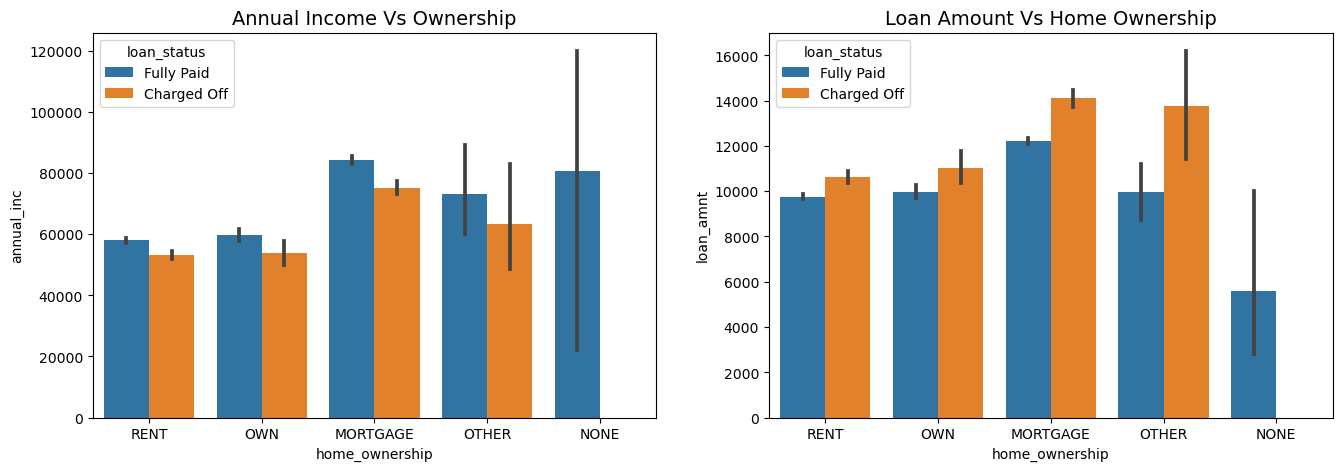

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(x=df.home_ownership, y=df.annual_inc, hue=df.loan_status, ax = ax[0])
ax[0].set_title("Annual Income Vs Ownership", fontsize=14)

sns.barplot(x=df.home_ownership, y=df.loan_amnt, hue=df.loan_status, ax = ax[1])
ax[1].set_title("Loan Amount Vs Home Ownership", fontsize=14)

plt.show()

when comparing with annual income and home ownership , and with loan amount with home ownership, there is a high likely hood for increased defaulters if they are paying Mortage even when they have a higher annual income.
On further analysis, it is ill advised to provide higher loan amounts to individuals who pay mortage, or they would have to undergo additional verification before approval is recommened.

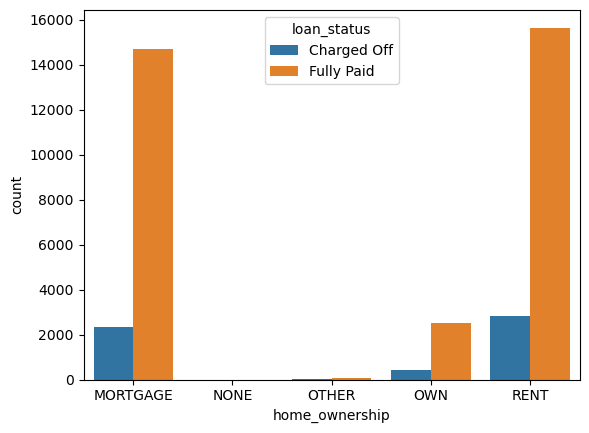

In [121]:
count_data = df.groupby(['home_ownership','loan_status']).size().reset_index(name='count')
sns.barplot(x='home_ownership', y='count', hue='loan_status', data=count_data)
plt.show()

From the above graph we can see that Mortage , Own and Rent are the most types of ownerships we have in terms of volume , 
and among them , People having Mortage and Rent still show higher chance of defaulting, compared to people who own their 
house

Text(0.5, 1.0, 'Purpose Vs income (Charged off only)')

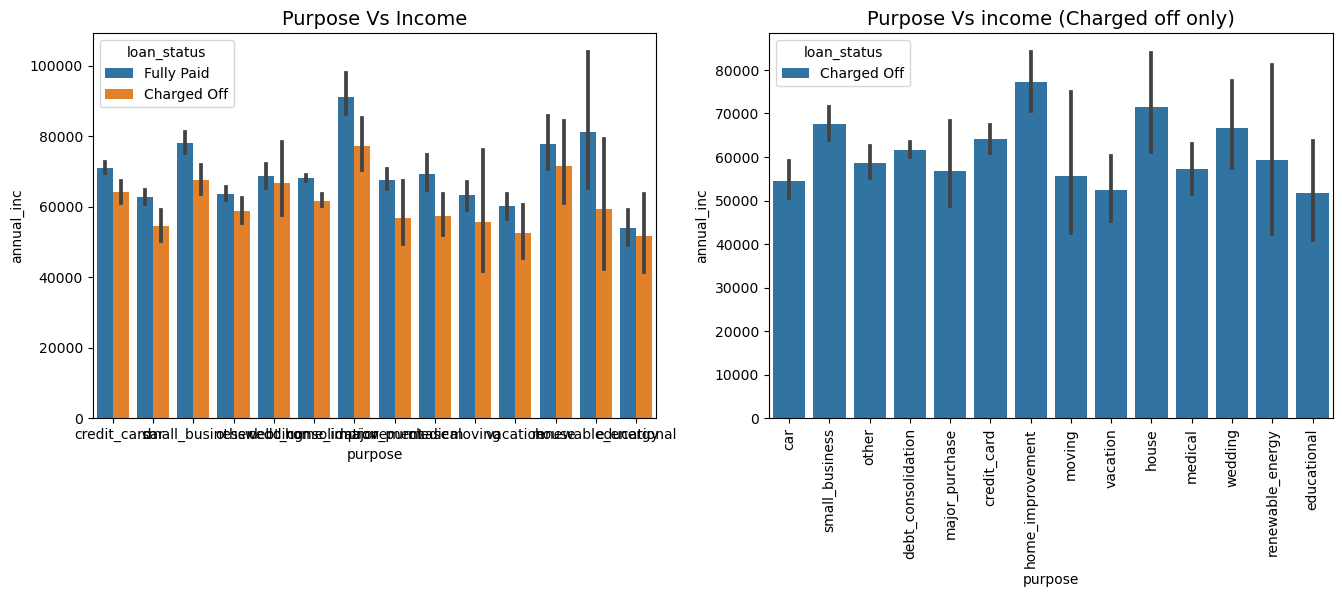

In [129]:


fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.barplot(data =df,x=df.purpose, y=df.annual_inc, hue =df.loan_status, ax = ax[0])
plt.xticks(rotation=90)
ax[0].set_title("Purpose Vs Income", fontsize=14)
charged_off_only = df[df['loan_status']=='Charged Off'];
sns.barplot(data =df,x=charged_off_only.purpose, y=charged_off_only.annual_inc, hue =charged_off_only.loan_status, ax = ax[1])
plt.xticks(rotation=90)
ax[1].set_title("Purpose Vs income (Charged off only)", fontsize=14)

People who tend to take loan for home_imporvement tend to default